# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

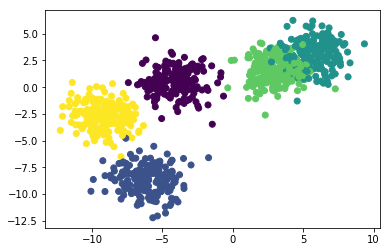

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1], c=Y)

In [5]:
import numpy as np

In [7]:
def cluster_center(cluster):
    return np.array([cluster[:, 0].mean(), cluster[:, 1].mean()])

In [39]:
def distance_func(point, base_point):
    return np.linalg.norm(point - base_point)

In [33]:
def find_clusters(X, centers):
    clusters = {} 
    for point in X:           
        cluster = min([(index, distance_func(point, center)) for index, center in enumerate(centers)],
                          key=lambda t:t[1])[0]
        if cluster in clusters:
            clusters[cluster].append(point)
        else:
            clusters[cluster] = [point]
            
    return {cluster: np.array(clusters[cluster]) for cluster in clusters}

In [24]:
def reevaluate_centers(clusters):
    return np.array([np.mean(clusters[cluster], axis = 0) for cluster in clusters])

In [23]:
def plot_cluster(clusters):
    for cluster in clusters:
        plt.scatter(clusters[cluster][0:,0], clusters[cluster][0:,1])
    plt.show()


In [40]:
def k_means(X, k, early_stop, plot=False):
    centers = X[:k]
    eps = float("inf")
    while eps >= early_stop:
        clusters = find_clusters(X, centers)
        if plot == True:
            plot_cluster(clusters)
        new_centers = reevaluate_centers(clusters)
        eps = sum([distance_func(centers[index], new_centers[index]) for index, _ in enumerate(centers)])
        centers = new_centers
    return clusters, centers

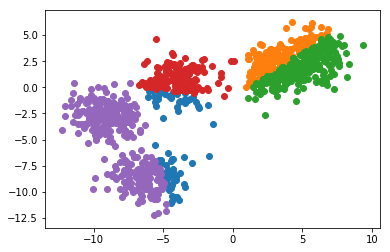

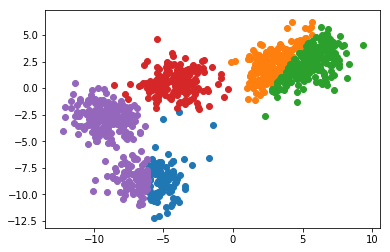

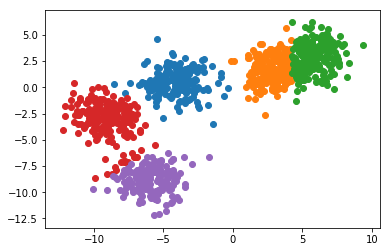

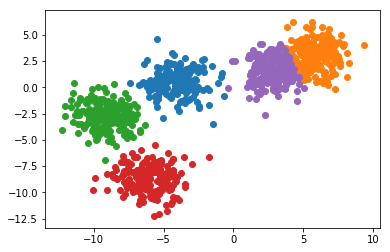

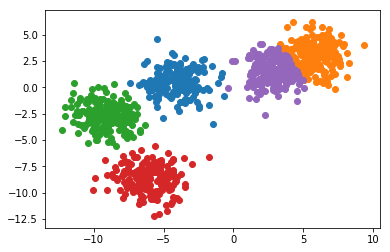

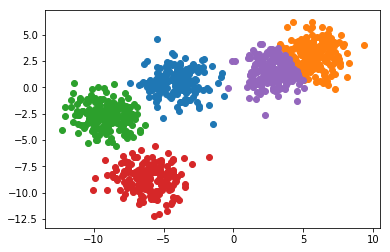

In [41]:
clusters, centers = k_means(X, 5, 0.1, plot=True)

In [47]:
def sse(clusters, centers):
    result = 0
    for cluster in clusters:
        for p in clusters[cluster]:
            result += distance_func(p, centers[cluster])
    return result

In [48]:
for k in range(1, 11):
    clusters, centers = k_means(X, k, 1.0)
    print("k = %d: SSE = %f" % (k, sse(clusters, centers)))

k = 1: SSE = 6739.190804
k = 2: SSE = 3492.922979
k = 3: SSE = 2572.328670
k = 4: SSE = 2303.727152
k = 5: SSE = 1489.440887
k = 6: SSE = 1440.611538
k = 7: SSE = 1382.888624
k = 8: SSE = 1340.969479
k = 9: SSE = 1279.217329
k = 10: SSE = 1238.648413


## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [50]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [51]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(10,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

10


In [53]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------')

In [54]:
for it in range(10):
    cls_info(df, it)

------ Кластер  0  -------
2005.7706779111256
151991.3342523516
1522.234836198508
95.07735971456374
206350.0171910477
передний    5970
Name: Привод, dtype: int64
ВАЗ     2045
Ford     576
Name: Марка, dtype: int64
седан      2842
хэтчбек    2670
Name: Кузов, dtype: int64
механика    5274
автомат      623
Name: КПП, dtype: int64
---------------------------
------ Кластер  1  -------
2006.22412109375
155953.6484375
3431.8359375
253.220703125
857438.0434570312
полный    1691
Name: Привод, dtype: int64
BMW              344
Mercedes-Benz    256
Name: Марка, dtype: int64
кроссовер      912
внедорожник    526
Name: Кузов, dtype: int64
автомат     1901
вариатор      84
Name: КПП, dtype: int64
---------------------------
------ Кластер  2  -------
1998.8716216216217
83747.32191119691
1687.30694980695
84.24276061776062
95474.43918918919
передний    907
Name: Привод, dtype: int64
ВАЗ    1231
УАЗ     200
Name: Марка, dtype: int64
седан          957
внедорожник    482
Name: Кузов, dtype: int64
меха

* Кластер 0:
В кластере находятся автомобили 2005-2006 года выпуска, пробег которых составляет примерно 150 000 км, с объемом двигателя в районе 1.5 литров и мощность около 100 л.с., средняя стоимость которых составляет 200 000, преимущественно с передним приводом и механической коробкой передач. Преобладают следующие марки: ВАЗ, Ford.
* Кластер 1:
В кластере находятся автомобили 2006 года выпуска, с пробегом около 150 000 км, с объемом двигателя в районе 3.5 литров и мощностью 250 л.с., средняя стоимость которых составляет 850 000, преимущественно с полным приводом и автоматической коробкой передач. В кластере в основном машины повышенной проходимости (кроссоверы и внедорожники). Преобладают следующие марки: BMW, Mercedes-Benz.
* Кластер 2:
В кластере находятся автомобили 1998 года выпуска, с пробегом около 85 000 км, с объемом двигателя в районе 1.6 литров и мощностью 84 л.с., средняя стоимость которых составляет до 100 000, преимущественно с передним приводом и махенической коробкой передач. Преобладают следующие марки: ВАЗ, УАЗ.
* Кластер 3:
В кластере находятся автомобили 2006 года выпуска, с пробегом около 150 000 км, с объемом двигателя в районе 2-2.5 литров и мощностью 160 л.с., средняя стоимость которых составляет около 520 000, преимущественно с полным приводом и автоматической коробкой передач. Преобладают следующие марки: Hyundai, Nissan.
* Кластер 4:
В кластере находятся автомобили 2011-2012 года выпуска, с пробегом около 65 000 км, с объемом двигателя в районе 1.6 литров и мощностью 100 л.с., средняя стоимость которых составляет около 420 000, преимущественно с передним приводом и механической коробкой передач. Преобладают следующие марки: Chevrolet, ВАЗ.
* Кластер 5:
В кластере находятся автомобили 1998-1999 года выпуска, с пробегом около 250 000 км, с объемом двигателя в районе 1.8 литров и мощностью 124 л.с., средняя стоимость которых составляет около 200 000, преимущественно с передним приводом и автоматической коробкой передач. Преобладают следующие марки: Toyota, Nissan.
* Кластер 6:
В кластере находятся автомобили 2013 года выпуска, с пробегом около 60 000 км, с объемом двигателя в районе 3-3.5 литров и мощностью 250 л.с., средняя стоимость которых составляет около 2 500 000, преимущественно с полным приводом и автоматической коробкой передач. Преобладают следующие марки: Toyota, BMW.
* Кластер 7:
В кластере находятся автомобили 2012-2013 года выпуска, с пробегом около 70 000 км, с объемом двигателя в районе 2 литров и мощностью 168 л.с., средняя стоимость которых составляет около 1 100 000, преимущественно с полным приводом и автоматической коробкой передач. Преобладают следующие марки: Toyota, Nissan.
* Кластер 8:
В кластере находятся автомобили 2011-2012 года выпуска, с пробегом около 75 000 км, с объемом двигателя в районе 1.6 литров и мощностью 126 л.с., средняя стоимость которых составляет около 600 000, преимущественно с передним приводом и автоматической коробкой передач. Преобладают следующие марки: Volkswagen, Hyundai.
* Кластер 9:
В кластере находятся автомобили 2008-2009 года выпуска, с пробегом около 100 000 км, с объемом двигателя в районе 1.6 литров и мощностью 100 л.с., средняя стоимость которых составляет около 300 000, преимущественно с передним приводом и механической коробкой передач. Преобладают следующие марки: ВАЗ, Chevrolet.